In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn import svm
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay


In [2]:
df_ccf = pd.read_csv("C:\\Users\\siskounen\\Documents\\Credit_Card_Fraud\\data_fraud.csv" , sep=',')

In [3]:
df_ccf.head()


,Unnamed: 0,ID,GENDER,CAR,REALITY,NO_OF_CHILD,INCOME,INCOME_TYPE,EDUCATION_TYPE,FAMILY_TYPE,HOUSE_TYPE,FLAG_MOBIL,WORK_PHONE,PHONE,E_MAIL,FAMILY SIZE,BEGIN_MONTH,AGE,YEARS_EMPLOYED,TARGET
0,0,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,2.0,29,59,3,0
1,1,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,4,52,8,0
2,2,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,26,52,8,0
3,3,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,26,52,8,0
4,4,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,38,52,8,0


<AxesSubplot:xlabel='TARGET'>

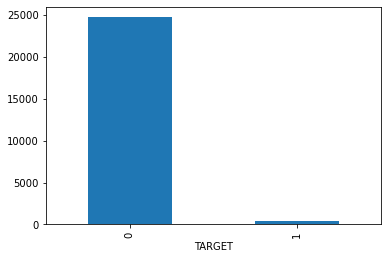

In [4]:
(df_ccf.groupby('TARGET')
   ['ID'].nunique()
   .plot.bar()
)

The class we are looking to predict is the one that corresponds to credit card fraud that is worth 1 in the $TARGET$ column. We notice that this class is very low in our dataset, so there is a problem of class imbalance. To overcome this problem, we will put weights on each of the classes using $class\_weight$.

First of all, we will retain only the quantitative variables of our dataset in the prediction of the $fraud$ class.

In [5]:
X = df_ccf[['NO_OF_CHILD','INCOME','FLAG_MOBIL','WORK_PHONE','PHONE','E_MAIL','FAMILY SIZE', 'BEGIN_MONTH','AGE','YEARS_EMPLOYED']]
Y = df_ccf[['TARGET']]


In [6]:
random_state = np.random.RandomState(0)
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.4,random_state=10)

Since the variable we are trying to predict, named TARGET in our dataset, is binary since it is worth 1 if there is fraud, O otherwise, we will use binary classification algorithms: linear regression, logistic regression and SVM.

## Linear regression:

In [7]:
clf=LinearRegression()
clf.fit(x_train,y_train)
clf.score(x_test,y_test)

0.005276566154889806

Cette méthode n'est clairement pas performante vu le score de prédiction que l'on obtient. Nous allons donc en étudier d'autres.

## Logistic regression

In [8]:
lr_balanced = LogisticRegression(class_weight = 'balanced', random_state=10).fit(X,Y)
print("Regression Logistic score:",lr_balanced.score(X,Y))


Regression Logistic score: 0.01679000557014403


C:\Users\siskounen\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [9]:
lr_custom = LogisticRegression(class_weight = {0:0.2 , 1:0.8}, random_state=10).fit(X,Y)
print("Regression Logistic score:",lr_custom.score(X,Y))

Regression Logistic score: 0.983209994429856


C:\Users\siskounen\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


A priori the best method to predict the $fraud$ class is logistic regression by adding weights manually.

### Roc curve for Logistic Regression

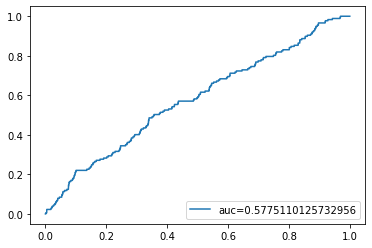

In [10]:
y_pred_proba=lr_custom.predict_proba(x_test)[::,1]
fpr , tpr, _ =metrics.roc_curve(y_test,y_pred_proba)
auc = metrics.roc_auc_score(y_test,y_pred_proba)
plt.plot(fpr,tpr,label= "auc="+str(auc))
plt.legend(loc=4)
plt.show()

### Confusion matrix for logistic regression

Confusion matrix,without normalization
[[9877    0]
 [ 177    0]]
Normalized confusion matrix
[[1. 0.]
 [1. 0.]]


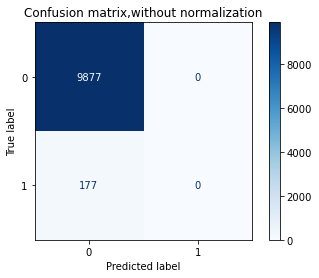

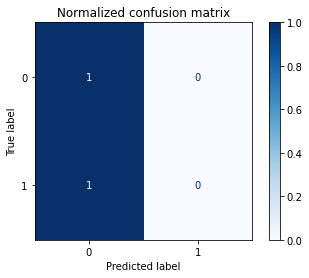

In [11]:
titles_options=[("Confusion matrix,without normalization" ,None),("Normalized confusion matrix","true")]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
    lr_custom,
    x_test,
    y_test,
    ##display_lables = class_names,
    cmap = plt.cm.Blues,
    normalize = normalize,
    )
    disp.ax_.set_title(title)
    
    print(title)
    print(disp.confusion_matrix)
    
plt.show()

However, after analyzing the ROC curve and the confusion matrix, we notice that this method is not very efficient. Indeed, this algorithm encounters difficulties in correctly classifying real frauds.

##  Logistic Regression with penalty L2

In [12]:
lr_l2_balanced = LogisticRegression(class_weight='balanced',penalty='l2',C=0.01)
lr_l2_balanced.fit(x_train,y_train)
y_pred = lr_l2_balanced.predict(x_test)
print("Regression Logistic with penalty L2 score with class balanced:", metrics.accuracy_score(y_test,y_pred))

Regression Logistic with penalty L2 score with class balanced: 0.017604933359856773


C:\Users\siskounen\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [13]:
lr_l2_custom = LogisticRegression(class_weight={0:0.2,1:0.8},penalty='l2',C=0.01)
lr_l2_custom.fit(x_train,y_train)
y_pred = lr_l2_custom.predict(x_test)
print("Regression Logistic with penalty L2 score with class cutomize:", metrics.accuracy_score(y_test,y_pred))

Regression Logistic with penalty L2 score with class cutomize: 0.9823950666401432


C:\Users\siskounen\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The results obtained by using an L2 penalty are the same as those obtained with the logistical regression with L1 penality (by default).

### Roc Curve for Logistic Regression with penalty L2

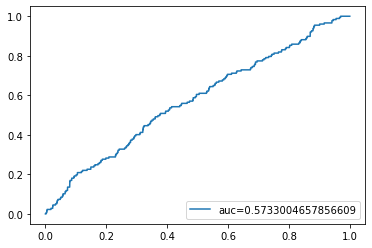

In [14]:
y_pred_proba=lr_l2_custom.predict_proba(x_test)[::,1]
fpr , tpr, _ =metrics.roc_curve(y_test,y_pred_proba)
auc = metrics.roc_auc_score(y_test,y_pred_proba)
plt.plot(fpr,tpr,label= "auc="+str(auc))
plt.legend(loc=4)
plt.show()

### Confusion Matrix for Logistic Regression with penalty L2

Confusion matrix,without normalization
[[9877    0]
 [ 177    0]]
Normalized confusion matrix
[[1. 0.]
 [1. 0.]]


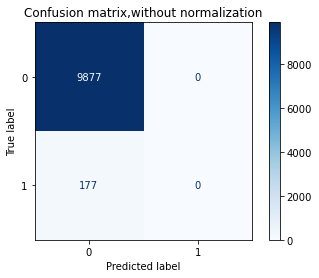

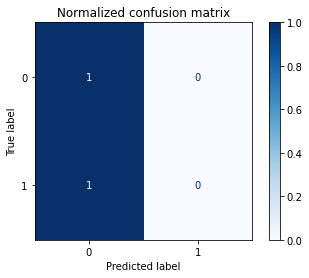

In [15]:
titles_options=[("Confusion matrix,without normalization" ,None),("Normalized confusion matrix","true")]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
    lr_l2_custom,
    x_test,
    y_test,
    ##display_lables = class_names,
    cmap = plt.cm.Blues,
    normalize = normalize,
    )
    disp.ax_.set_title(title)
    
    print(title)
    print(disp.confusion_matrix)
    
plt.show()

However, analysis of the ROC curve and confusion matrix indicates that this algorithm has just as much trouble classifying true frauds. But, the area under the ROC curve of logistic regression and more important than that of logistic regression with L2 penality. So, a priori, by imposing an L1 penalty, we better classify real frauds.

## SVM

In [16]:
classifier = OneVsRestClassifier(svm.SVC(kernel="rbf" , probability=True, class_weight={0:0.2,1:0.8} ,random_state=random_state))
y_score = classifier.fit(x_train, y_train).decision_function(x_test)
y_score

array([-0.99996192, -1.00002974, -0.99986297, ..., -1.00004587,
       -0.99986286, -1.00003022])

### Roc Curve for SVM

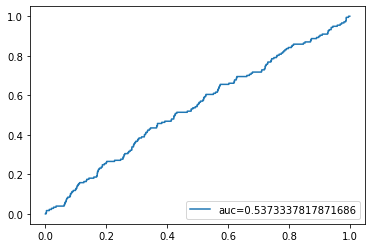

In [17]:
y_pred_proba=classifier.predict_proba(x_test)[::,1]
fpr , tpr, _ =metrics.roc_curve(y_test,y_pred_proba)
auc = metrics.roc_auc_score(y_test,y_pred_proba)
plt.plot(fpr,tpr,label= "auc="+str(auc))
plt.legend(loc=4)
plt.show()

### Confusion Matrix for SVM

Confusion matrix,without normalization
[[9877    0]
 [ 177    0]]
Normalized confusion matrix
[[1. 0.]
 [1. 0.]]


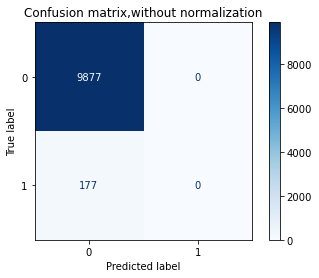

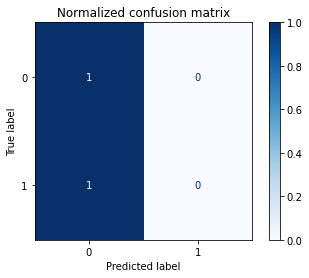

In [18]:
titles_options=[("Confusion matrix,without normalization" ,None),("Normalized confusion matrix","true")]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
    classifier,
    x_test,
    y_test,
    ##display_lables = class_names,
    cmap = plt.cm.Blues,
    normalize = normalize,
    )
    disp.ax_.set_title(title)
    
    print(title)
    print(disp.confusion_matrix)
    
plt.show()

The SVM method is tested with a rbf kernel by imposing a weight of 0.2 for class 0 and 0.8 for class 1, it is found that this method is less efficient than the two previously tested methods.